In [103]:
# Importing libraries to use

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50

In [40]:
#Importing data
cs_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv", index_col = 0)

## Data Cleaning

In [41]:
# Cleaning data
def cleaning_data (df):
    df.columns = [i.lower().replace(" ", "_") for i in df.columns]
    df.rename(columns = {"employmentstatus": "employment_status"}, inplace = True)
    df = df.drop_duplicates().reset_index()
    df = df.drop(columns = ["index","customer","number_of_open_complaints","vehicle_type","effective_to_date"])
    df = df.dropna()
    return df

In [42]:
def transforming_data (df):
    df=df[df['income'] > 0]
    df["total_claim_amount"] = round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    return df

In [43]:
cs_df = cleaning_data(cs_df)
cs_df = transforming_data(cs_df)

<ipython-input-42-30934e13c8f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_claim_amount"] = round(df["total_claim_amount"],0)
<ipython-input-42-30934e13c8f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
<ipython-input-42-30934e13c8f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [44]:
cs_df.head()

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,College,Employed,M,48029,Suburban,Married,...,7.0,52,9,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,34.0,31,2,Personal Auto,Personal,Offer3,Call Center,480.0,SUV,Medsize
3,Oregon,22332.0,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,10.0,3,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Doctor,Employed,F,37405,Urban,Married,...,8.0,99,4,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,4956.0,No,Basic,High School or Below,Employed,M,87197,Urban,Single,...,35.0,45,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize


In [45]:
cs_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [46]:
cs_df.shape

(6817, 21)

In [47]:
# Export cleaned dataframe to .csv

cs_df.to_csv(r'C:\Users\DACA\Desktop\export_dataframe.csv')

## Data exploration / plotting

EDA Categorical columns

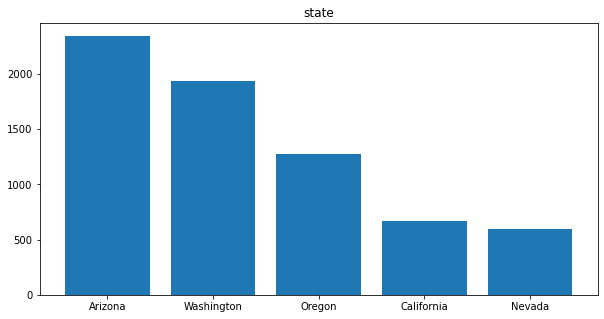

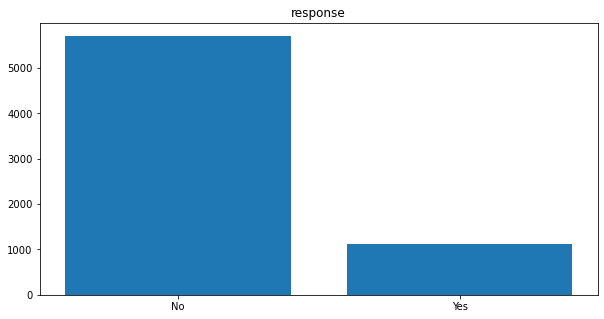

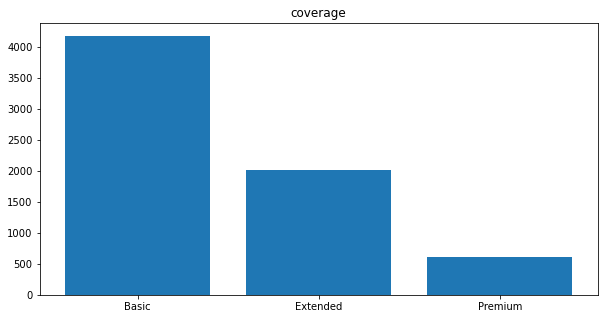

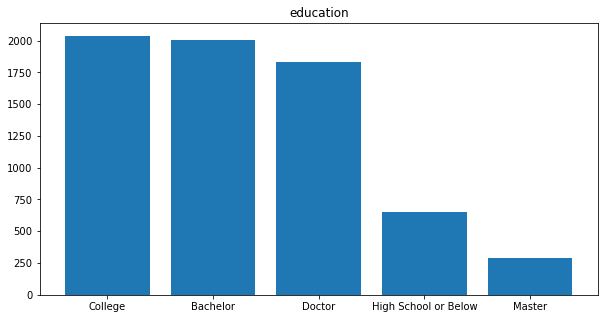

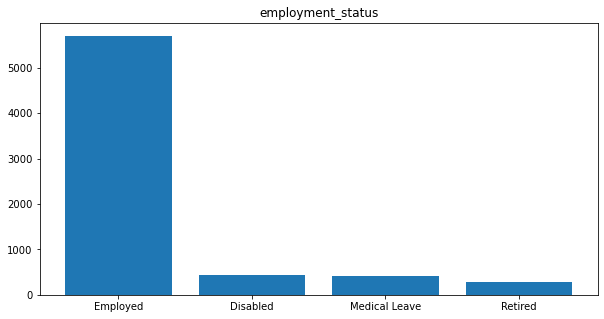

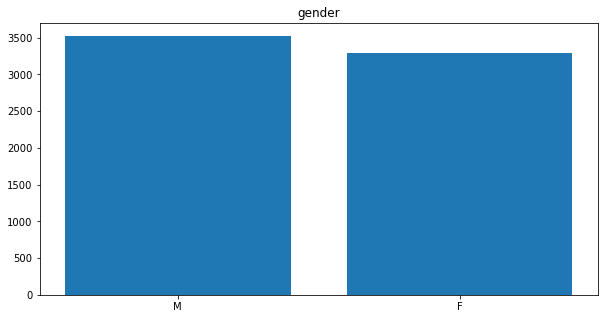

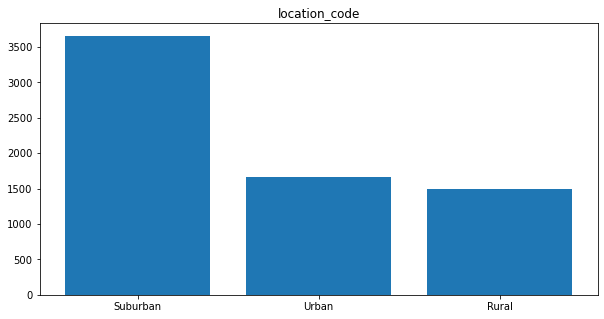

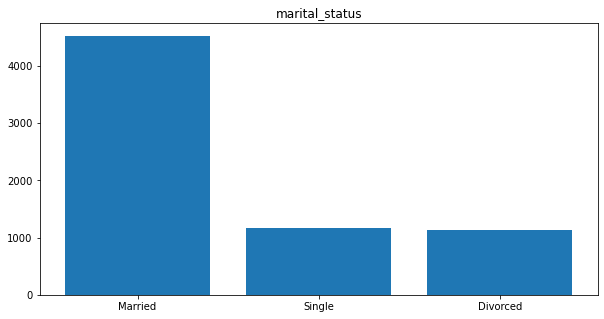

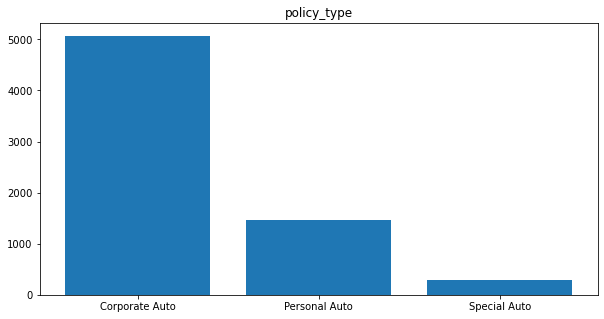

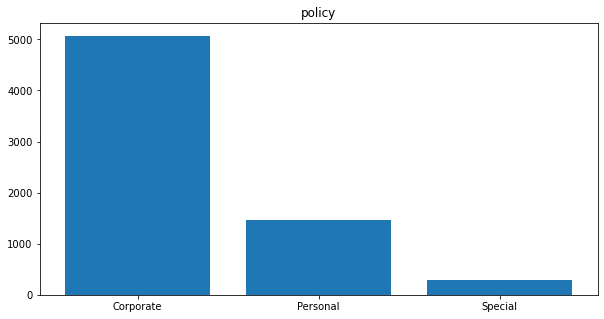

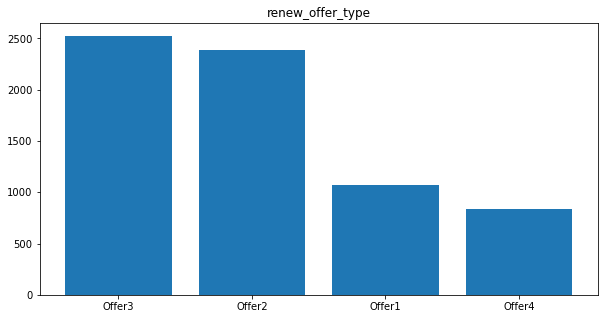

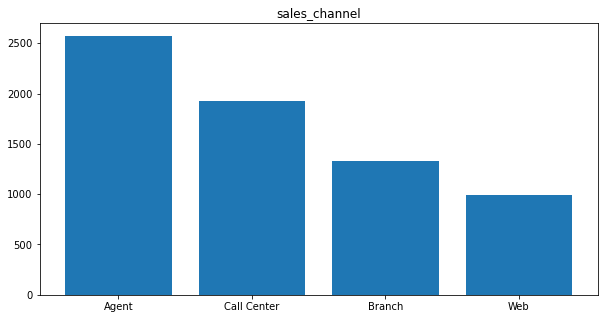

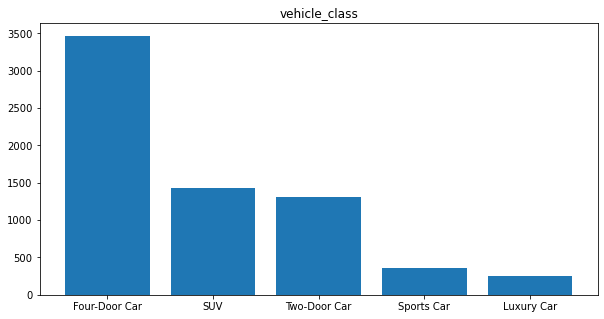

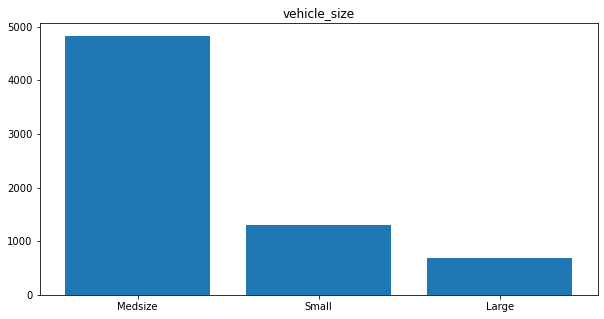

In [48]:
for c in cs_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(cs_df[c].unique(), cs_df[c].value_counts())
    plt.title(c)
    plt.show()

### Show a plot of the total number of responses.

In [49]:
num_responses = cs_df['response'].value_counts()
print(num_responses)

No     5707
Yes    1110
Name: response, dtype: int64


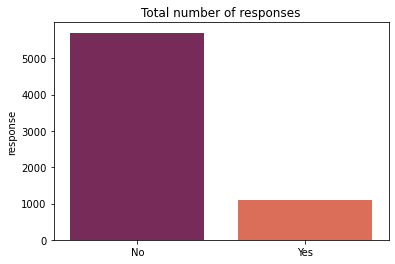

In [50]:
fig, ax = plt.subplots()

ax.set_title("Total number of responses")

sns.barplot(x=num_responses.index, y=num_responses, palette = 'rocket')

plt.show()

### Show response rate by channel.

In [51]:
response_rate = cs_df.groupby(['response', 'sales_channel']).size().reset_index(name= 'count')
print(response_rate)

  response sales_channel  count
0       No         Agent   2021
1       No        Branch   1660
2       No   Call Center   1167
3       No           Web    859
4      Yes         Agent    552
5      Yes        Branch    264
6      Yes   Call Center    162
7      Yes           Web    132


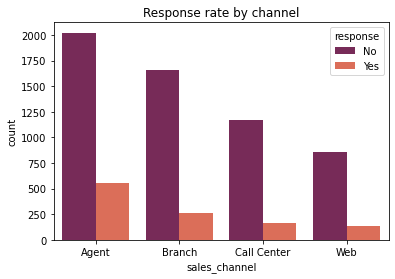

In [52]:
#plot 
    
fig, ax = plt.subplots()

ax.set_title("Response rate by channel")

# seaborn barplot
sns.barplot(x = response_rate['sales_channel'], y = response_rate['count'], hue = response_rate['response'], data = cs_df, palette = "rocket")
plt.show()

### Show a plot of the response rate by the total claim amount.

In [53]:
total_cl_amount = cs_df.groupby(['response','total_claim_amount']).size().reset_index(name = 'count')
print(total_cl_amount)

     response  total_claim_amount  count
0          No                 0.0      3
1          No                 1.0      6
2          No                 2.0      7
3          No                 3.0      9
4          No                 4.0      8
...       ...                 ...    ...
1094      Yes              1261.0      6
1095      Yes              1295.0      6
1096      Yes              1301.0      6
1097      Yes              1325.0      6
1098      Yes              1358.0      6

[1099 rows x 3 columns]


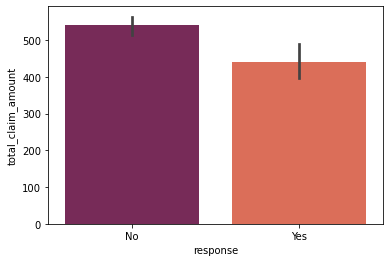

In [54]:
# Plot

sns.barplot(x = total_cl_amount['response'], y = total_cl_amount['total_claim_amount'], palette = 'rocket')
plt.show()

### Show a plot of the response rate by income.

In [55]:
r_income =  cs_df.groupby(['response', 'income']).size().reset_index(name = 'count')
print(r_income)

     response  income  count
0          No   10037      1
1          No   10074      1
2          No   10097      1
3          No   10105      1
4          No   10147      1
...       ...     ...    ...
5697      Yes   95697     12
5698      Yes   96306      6
5699      Yes   97131      6
5700      Yes   97361      6
5701      Yes   99845      6

[5702 rows x 3 columns]


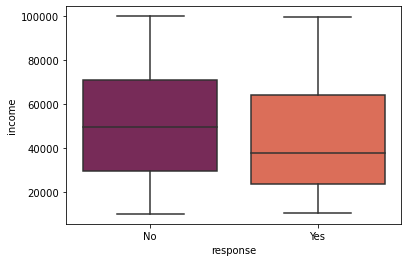

In [56]:
# Plot

sns.boxplot(x = 'response', y = 'income', data = r_income, palette = "rocket")
plt.show()

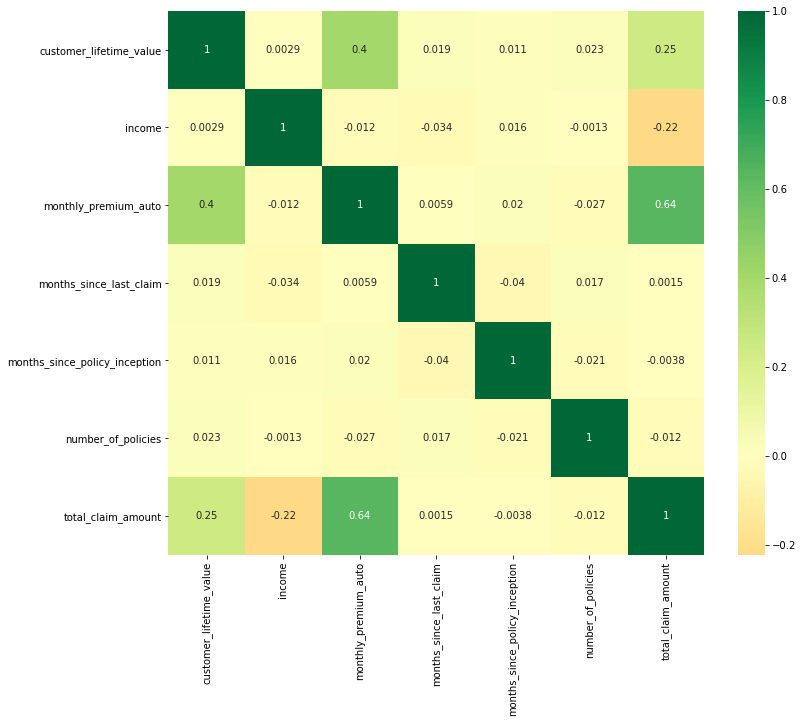

In [57]:
# Correlation heatmap

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(cs_df.corr(),annot=True, ax=ax,  cmap='RdYlGn', center=0)
plt.show()

## Data transformation 

In [58]:
# Getting numerical data

numerical = cs_df.select_dtypes(include = np.number)
print(numerical)

       customer_lifetime_value  income  monthly_premium_auto  \
0                       4809.0   48029                    61   
2                      14948.0   22139                   100   
3                      22332.0   49078                    97   
6                       5035.0   37405                    63   
7                       4956.0   87197                    63   
...                        ...     ...                   ...   
10865                   3579.0   28304                    91   
10866                   2772.0   59855                    74   
10869                   5259.0   61146                    65   
10870                  23893.0   39837                   201   
10871                  11972.0   64195                   158   

       months_since_last_claim  months_since_policy_inception  \
0                          7.0                             52   
2                         34.0                             31   
3                         10.0      

In [59]:
# Getting categorical data

categorical = cs_df.select_dtypes(include = np.object)
print(categorical)

            state response  coverage             education employment_status  \
0         Arizona       No     Basic               College          Employed   
2      Washington       No     Basic              Bachelor          Employed   
3          Oregon      Yes  Extended               College          Employed   
6      California       No     Basic                Doctor          Employed   
7      California       No     Basic  High School or Below          Employed   
...           ...      ...       ...                   ...               ...   
10865  California       No  Extended  High School or Below          Employed   
10866     Arizona       No     Basic               College          Employed   
10869      Oregon       No     Basic               College          Employed   
10870     Arizona       No  Extended              Bachelor          Employed   
10871  California       No   Premium               College          Employed   

      gender location_code marital_stat

<ipython-input-59-cbed6b1dc3d8>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = cs_df.select_dtypes(include = np.object)


In [60]:
min_max_scaler = preprocessing.MinMaxScaler()
numerical_scaled = min_max_scaler.fit_transform(numerical)
cs_df_normalized = pd.DataFrame(numerical_scaled)

print(cs_df_normalized)

NameError: name 'preprocessing' is not defined

#### Check the normality of the numerical variables visually.


In [ ]:
sns.displot(cs_df.income, bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.customer_lifetime_value,  bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.monthly_premium_auto, bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.months_since_last_claim, bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.months_since_policy_inception, bins = 20)
plt.show()

In [ ]:
sns.pairplot(cs_df)
plt.show()

#### For the numerical variables, check the multicollinearity between the features. 

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(numerical.corr(),annot=True, ax=ax,  cmap='RdYlGn', center=0)
plt.show()

## Data processing


### Standardization

#### Categorical variables transformation.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# define example
data = [['Corporate Auto'], ['Personal Auto'], ['Special Auto']]
values = array(data)
print(values)

In [ ]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

In [ ]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

In [ ]:
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

## X-Y-split

In [85]:
# x-y split - split the target variable from dependant variables

X = cs_df.drop(columns = ['total_claim_amount'])
y = cs_df.total_claim_amount

In [87]:
# Get the numeric data

numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809.0,48029,61,7.0,52,9
2,14948.0,22139,100,34.0,31,2
3,22332.0,49078,97,10.0,3,2
6,5035.0,37405,63,8.0,99,4
7,4956.0,87197,63,35.0,45,3


In [88]:
#Standardize
X_scaled=StandardScaler().fit_transform(numericals_features)
X_scaled.shape

(6817, 6)

In [89]:
#Get Categorical data

categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize


Categoricals transformation

In [91]:
# One-Hot-Encoding

In [62]:
# get dummies pandas
categorical_features = pd.get_dummies(categorical, drop_first=True)

In [63]:
categorical_features

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,1,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10866,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
10869,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
10870,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
#Merging the encoded results into the original data frame

In [95]:
all_features = pd.concat([numericals_features, categorical_features], axis=1) 
all_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,...,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,4809.0,48029,61,7.0,52,9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14948.0,22139,100,34.0,31,2,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,22332.0,49078,97,10.0,3,2,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
6,5035.0,37405,63,8.0,99,4,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,4956.0,87197,63,35.0,45,3,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0


#### Train Test Split

In [96]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [97]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,...,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
2518,4196.0,18052,111,5.0,71,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1161,11473.0,66538,95,14.0,64,2,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3268,4769.0,51144,61,28.0,32,9,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
8040,9320.0,21033,118,5.0,22,8,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
10606,17786.0,99790,64,24.0,8,2,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,5228.0,70988,65,3.0,82,7,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1865,11639.0,25370,102,10.0,77,2,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6086,2396.0,39062,61,2.0,20,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
6979,9199.0,31562,115,14.0,6,3,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


### Linear Regression

In [99]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train

y
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

In [100]:
y_pred

array([ 201.2851077 ,  147.02761487,  382.59732963, ...,  375.57978315,
       1412.08737793,  421.83944924])

Text(0.5, 1.0, 'Train Residual histogram')

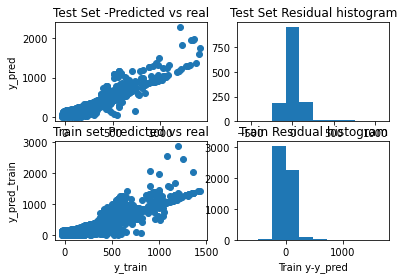

In [101]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

#### Model Validation

MSE

In [104]:
train_mse = mse(y_train,model.predict(X_train.to_numpy()))
test_mse = mse(y_test,model.predict(X_test.to_numpy()))

print('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 12502.629909310861 -- test MSE: 12862.5629615593


RMSE

In [105]:
print('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 111.81515956841837 -- test RMSE: 113.41323979835556


MAE

In [106]:
print('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 111.81515956841837 -- test RMSE: 113.41323979835556


R2

In [107]:
r2 = model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.8243309280682153
0.8243309280682153


In [108]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

train R2: 0.7965627757420377 -- test R2: 0.8243309280682153


Adjusted R2

In [109]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8231632606772359


#### Feature importance

In [110]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [111]:
features_importances

,Attribute,Importance
21,location_code_Suburban,376.623285
22,location_code_Urban,220.409130
18,employment_status_Medical Leave,20.777913
29,renew_offer_type_Offer2,12.778440
20,gender_M,10.592791
9,state_Washington,9.734025
30,renew_offer_type_Offer3,9.343535
31,renew_offer_type_Offer4,8.342420
34,sales_channel_Web,5.466989
2,monthly_premium_auto,4.624945


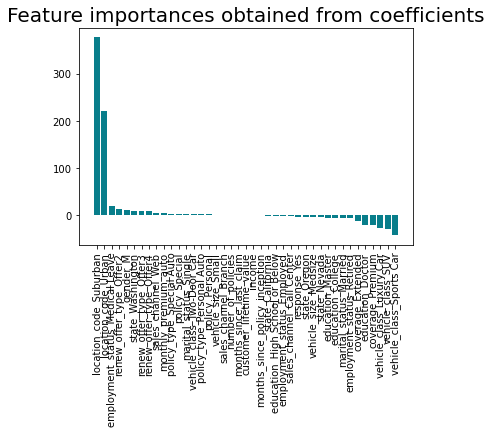

In [112]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()